In [54]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

import pandas as pd
#import matplotlib.pyplot as plt

url = ''
#creating a dataframe
#my_df = pd.read_csv(url)

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 

iris

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

{'data': {'ids': None,
  'features':      sepal length  sepal width  petal length  petal width
  0             5.1          3.5           1.4          0.2
  1             4.9          3.0           1.4          0.2
  2             4.7          3.2           1.3          0.2
  3             4.6          3.1           1.5          0.2
  4             5.0          3.6           1.4          0.2
  ..            ...          ...           ...          ...
  145           6.7          3.0           5.2          2.3
  146           6.3          2.5           5.0          1.9
  147           6.5          3.0           5.2          2.0
  148           6.2          3.4           5.4          2.3
  149           5.9          3.0           5.1          1.8
  
  [150 rows x 4 columns],
  'targets':               class
  0       Iris-setosa
  1       Iris-setosa
  2       Iris-setosa
  3       Iris-setosa
  4       Iris-setosa
  ..              ...
  145  Iris-virginica
  146  Iris-virginica
  147  

In [55]:
# Modify the target labels to numbers
iris.data.targets = iris.data.targets.replace({
    'class': {
        'Iris-setosa': 0,
        'Iris-versicolor': 1,
        'Iris-virginica': 2
    }
})

y = iris.data.targets

iris

/var/folders/tv/l68gvpr530b23whvlxhdx5ww0000gn/T/ipykernel_77540/1433315590.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris.data.targets = iris.data.targets.replace({


{'data': {'ids': None,
  'features':      sepal length  sepal width  petal length  petal width
  0             5.1          3.5           1.4          0.2
  1             4.9          3.0           1.4          0.2
  2             4.7          3.2           1.3          0.2
  3             4.6          3.1           1.5          0.2
  4             5.0          3.6           1.4          0.2
  ..            ...          ...           ...          ...
  145           6.7          3.0           5.2          2.3
  146           6.3          2.5           5.0          1.9
  147           6.5          3.0           5.2          2.0
  148           6.2          3.4           5.4          2.3
  149           5.9          3.0           5.1          1.8
  
  [150 rows x 4 columns],
  'targets':      class
  0        0
  1        0
  2        0
  3        0
  4        0
  ..     ...
  145      2
  146      2
  147      2
  148      2
  149      2
  
  [150 rows x 1 columns],
  'original':      s

In [56]:
#Train test split

from sklearn.model_selection import train_test_split
import torch

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

#converting x features to float tensors
X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)

#converting y labels to long tensors
y_train = torch.LongTensor(np.array(y_train).squeeze())
y_test = torch.LongTensor(np.array(y_test).squeeze())



from simpleNeuralNetwork import Model
#pick a manual seed for randomization
torch.manual_seed(41)
#create an instance of model
model = Model()

#set the criterion of model to measure the error
criterion = nn.CrossEntropyLoss()

#choose an optimizer, lr = learning rate
# Adam is a popular optimizer that adapts the learning rate for each parameter
#if error doesn't go down after a bunch of iterations, lower the learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)>

In [57]:
#train the model
#epochs = one run through the entire training dataset
epochs = 100
losses = []
for i in range(epochs):
    #forward pass and get the predictions
    y_pred = model(X_train)
    
    #calculate the loss, predicted value vs. the actual value
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())

    #print every 10 epochs
    if i % 10 == 0:
        print(f'Epoch {i}, Loss: {loss.item()}')
    
    #backward pass
    #take the error rate of forward propagation and feed it back to fine tune the weights
    optimizer.zero_grad()
    loss.backward()
    
    #update the weights
    optimizer.step()
    

Epoch 0, Loss: 1.1124252080917358
Epoch 10, Loss: 1.0986120700836182
Epoch 20, Loss: 1.0986120700836182
Epoch 30, Loss: 1.0986120700836182
Epoch 40, Loss: 1.0986120700836182
Epoch 50, Loss: 1.0986120700836182
Epoch 60, Loss: 1.0986120700836182
Epoch 70, Loss: 1.0986120700836182
Epoch 80, Loss: 1.0986120700836182
Epoch 90, Loss: 1.0986120700836182


In [19]:
#combining all code into one cell
import torch
import torch.nn as nn
import torch.nn.functional as F
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
import numpy as np

# Set manual seed
torch.manual_seed(41)

# Load dataset, replace class names with integers
iris = fetch_ucirepo(id=53)
X = iris.data.features
y = iris.data.targets.replace({
    'class': {
        'Iris-setosa': 0,
        'Iris-versicolor': 1,
        'Iris-virginica': 2
    }
})

# Split dataset into training and test sets
# Note: X and y are pandas DataFrames/Series, so we need to convert them to numpy arrays
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# Convert to tensors
X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)
y_train = torch.LongTensor(np.array(y_train).squeeze())
y_test = torch.LongTensor(np.array(y_test).squeeze())

# Define model class
class Model(nn.Module):
    def __init__(self, input_features=4, h1=8, h2=8, output_features=3):
        super().__init__()
        self.fc1 = nn.Linear(input_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, output_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.out(x)

# Initialize model, loss, and optimizer
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
model.train()
epochs = 100
losses = []

for i in range(epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    
    if i % 10 == 0:
        print(f"Epoch {i}, Loss: {loss.item()}")

# Check gradients
print("\nfc1 weight gradients:\n", model.fc1.weight.grad)



Epoch 0, Loss: 1.1318050622940063
Epoch 10, Loss: 0.9658582210540771
Epoch 20, Loss: 0.6791526675224304
Epoch 30, Loss: 0.40087202191352844
Epoch 40, Loss: 0.22570069134235382
Epoch 50, Loss: 0.12255843728780746
Epoch 60, Loss: 0.07509136945009232
Epoch 70, Loss: 0.05467577278614044
Epoch 80, Loss: 0.044483862817287445
Epoch 90, Loss: 0.03846165910363197

fc1 weight gradients:
 tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-3.4776e-03,  7.0710e-04, -3.4693e-03, -5.1956e-03],
        [ 4.5421e-05, -2.8397e-03,  8.4117e-04,  5.8158e-03],
        [ 7.8118e-04, -3.5647e-03,  1.6814e-03,  8.5225e-03],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-1.8375e-03, -4.7147e-03, -4.2261e-04,  8.2311e-03],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]])


/var/folders/tv/l68gvpr530b23whvlxhdx5ww0000gn/T/ipykernel_57607/2870300992.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = iris.data.targets.replace({


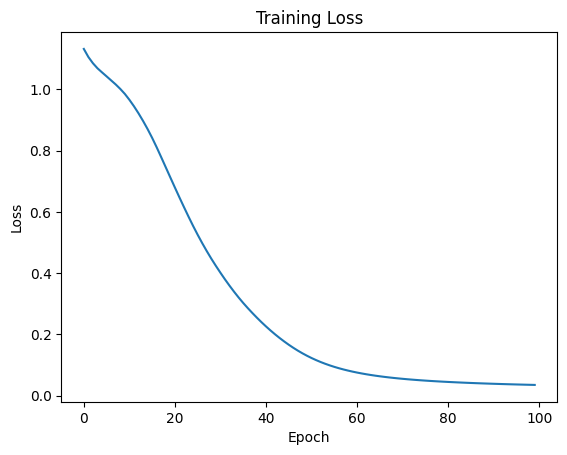

In [20]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


In [21]:
print((model(X_test)))

tensor([[ -7.7132,   1.5807,   4.8588],
        [-10.2249,   0.5155,   8.7638],
        [-10.7185,   1.1882,   8.2269],
        [ -4.4690,   3.5339,  -1.1210],
        [ -9.0873,   1.4669,   6.2793],
        [ -2.2770,   3.7022,  -4.1140],
        [ -7.0673,   2.2028,   3.2917],
        [ -4.2226,   3.6468,  -1.5420],
        [ -8.0634,   1.8251,   4.7820],
        [-10.8515,   0.5058,   9.3629],
        [ -6.8611,   2.2126,   3.0811],
        [  9.4301,   3.2669, -18.8494],
        [  8.5966,   2.9338, -17.1305],
        [ -1.0571,   3.1664,  -4.7063],
        [  8.0257,   3.2468, -16.7651],
        [ -6.7032,   2.4148,   2.6586],
        [  8.4607,   3.0915, -17.1118],
        [ -7.5983,   1.7014,   4.5610],
        [  9.0443,   3.1470, -18.0944],
        [  7.7209,   2.9005, -15.7171],
        [ -1.6889,   3.3903,  -4.2968],
        [-10.0090,   1.0498,   7.7576],
        [  8.2616,   3.2254, -17.0361],
        [  9.2014,   3.0883, -18.2702],
        [ -1.3313,   3.4926,  -4.9621],


In [ ]:
# softmax = nn.Softmax(dim=1)
# predictions = softmax(model(X_test))
# print(predictions)
normalized = torch.nn.functional.softmax(model(X_test), dim=1)
#print(normalized)

#round data (show only first 4 decimal points)
normalized_np = normalized.detach().cpu().numpy()
rounded = np.round(normalized_np, 4)
np.set_printoptions(precision=4, suppress=True)
print(rounded)

[[0.     0.0363 0.9637]
 [0.     0.0003 0.9997]
 [0.     0.0009 0.9991]
 [0.0003 0.9902 0.0094]
 [0.     0.0081 0.9919]
 [0.0025 0.9971 0.0004]
 [0.     0.2518 0.7482]
 [0.0004 0.9941 0.0055]
 [0.     0.0494 0.9506]
 [0.     0.0001 0.9999]
 [0.     0.2956 0.7044]
 [0.9979 0.0021 0.    ]
 [0.9965 0.0035 0.    ]
 [0.0144 0.9852 0.0004]
 [0.9917 0.0083 0.    ]
 [0.     0.4393 0.5606]
 [0.9954 0.0046 0.    ]
 [0.     0.0542 0.9458]
 [0.9973 0.0027 0.    ]
 [0.992  0.008  0.    ]
 [0.0062 0.9934 0.0005]
 [0.     0.0012 0.9988]
 [0.9935 0.0065 0.    ]
 [0.9978 0.0022 0.    ]
 [0.008  0.9918 0.0002]
 [0.0024 0.9969 0.0007]
 [0.0002 0.9891 0.0107]
 [0.003  0.9964 0.0006]
 [0.998  0.002  0.    ]
 [0.0003 0.9668 0.0329]]
